## Nama : Sinta Bella Agustina
## NIM    : 09011281722062
## Kelas : SK5B

<div class="alert alert-info">
<h2> <center> KLASIFIKASI RESIKO CERVICAL CANCER MENGGUNAKAN ARTIFICIAL NEURAL NETWORK 

### 1. Import Library

Penjelasan :

1. Numpy

Numpy memiliki kegunaan untuk operasi vektor dan matriks. Fiturnya hampir sama dengan MATLAB dalam mengelola array dan array multidimensi. Numpy merupakan salah satu library yang digunakan oleh library lain seperti Scikit-Learn untuk keperluan analisis data.


2. Pandas

Pandas adalah librari analisis data yang memiliki struktur data yang diperlukan untuk membersihkan data mentah ke dalam sebuah bentuk yang cocok untuk analisis (yaitu tabel). 


3. SkLearn

Modul ini adalah salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti :
- Sklearn.preprocessing = Digunakan Untuk Pemprosessan Data Pada GPU Atau CPU (Training, Test, Asli)
- sklearn.Model_Selection = Digunakan Untuk Memilah Dataset Menjadi Data Training, Data Testing Dan Data Aslinya


4. Matplotlib

Data yang kita olah tentu tidak elok apabila ditampilkan begitu saja. Bila ditampilkan dengan sejumlah grafik berwarna pasti mereka akan lebih tertarik melihatnya. Matplotlib membantu kamu untuk memvisualisasikan data dengan lebih indah dan rapi.

5. Keras

Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network. seperti :
- Keras.Model = Digunakan Untuk Memasukkan Hidden Layers (Banyaknya Jalan Pada 1 Data Ke Data Yang Lain) Dengan Sequential
- Keras.Layers = Digunakan Untuk Banyaknya Hidden Layers Yang Digunakan Untuk 1 Data Set (Banyaknya Cara/Jalan)
- Keras.activations = Digunakan Untuk Mengubah Setiap Nilai Input - Keras.optimizer = Digunakan Untuk Mengoptimalkan Data Dengan Fungsi Adam


6. Seaborn 

Modul ini Digunakan Untuk Visualisasi Data Secara Statistik


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import seaborn as sns

Using TensorFlow backend.


## 2. Memasukkan Dataset

Dataset yang ditampilkan merupakan dataset cervical cancer risk clasification


In [2]:
pwd

'C:\\Users\\User\\Downloads'

In [3]:
dataset = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

# Menampilkan 5 Data Teratas Dari Dataset Cervical Cancer

In [4]:
dataset.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# Menampilkan Informasi Data Set

Menampilkan info dari dataset cervical cancer yang meliputi banyaknya indeks, jumlah baris dan kolom, serta jumlah indeks dari masing-masing atribut.
Data tersebut terdiri dari 858 indeks dengan jumlah 36 kolom dan 858 baris, dan di setiap atributnya memiliki 858 indeks

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

# Menampilkan Dataset

In [6]:
dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


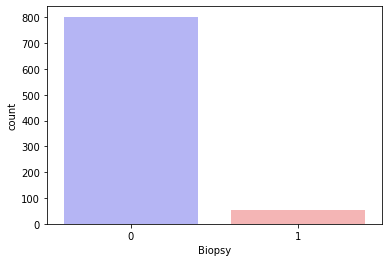

In [7]:
sns.countplot(x="Biopsy", data=dataset, palette="bwr")
plt.show()

### Normalisasi Data

Pada ANN tidak bisa memproses data dalam bentuk teks. Oleh karena itu, data dinormalisasi dan dikonversi menjadi bentuk angka.

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in dataset.columns:
    dataset[column] = labelencoder.fit_transform(dataset[column])

## 3. Menentukan nilai pada input :
- Features [:,0:35] => nilai feature diambil dari kolom dataset ke-0 sampai dengan kolom dataset ke-35 sebagai nilai input
- Labela [:,35] => nilai label diambil dari kolom dataset ke-35 sebagai nilai output

In [9]:
features = dataset.iloc[:, 0:35]
labels = dataset.iloc[:, 35]

In [10]:
print(labels)

0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     0
26     0
27     0
28     0
29     0
      ..
828    0
829    0
830    0
831    0
832    0
833    0
834    0
835    0
836    0
837    0
838    0
839    0
840    0
841    0
842    0
843    0
844    0
845    0
846    0
847    0
848    0
849    0
850    0
851    0
852    0
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64


In [11]:
dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,5,6,5,1,0,0,0,0,0,0,...,18,18,0,0,0,0,0,0,0,0
1,2,0,4,1,0,0,0,0,0,0,...,18,18,0,0,0,0,0,0,0,0
2,21,0,21,1,0,0,0,0,0,0,...,18,18,0,0,0,0,0,0,0,0
3,39,7,6,6,1,23,49,1,29,0,...,18,18,1,0,1,0,0,0,0,0
4,33,5,11,6,0,0,0,1,20,0,...,18,18,0,0,0,0,0,0,0,0
5,29,5,13,4,0,0,0,0,0,0,...,18,18,0,0,0,0,0,0,0,0
6,38,5,7,8,1,22,47,0,0,1,...,18,18,0,0,0,0,1,1,0,1
7,13,0,16,5,0,0,0,1,24,1,...,18,18,0,0,0,0,0,0,0,0
8,32,0,10,7,0,0,0,0,0,0,...,18,18,1,0,1,1,0,0,0,0
9,31,5,5,11,1,4,42,0,0,2,...,18,18,0,0,0,0,0,0,0,0


In [12]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

## Splitting
Proses Splitiing dataset manjadi training set dan test set

In [13]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [14]:
model = Sequential()
model.add(Dense(units= 80, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 40, activation=relu))
model.add(Dense(units= 40, activation=relu))
model.add(Dense(units= 40, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

## Epoch
Proses epoch atau tranning data dengan menggunakan 90x dan batch size 50x

Epoch = adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation) 

Batch Size  = adalah jumlah sampel data yang disebarkan ke Neural Network. 


In [15]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=50, epochs=90)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 686 samples, validate on 172 samples
Epoch 1/90
686/686 [==============================] - 1s 2ms/step - loss: 0.7487 - accuracy: 0.1501 - val_loss: 0.7298 - val_accuracy: 0.0756
Epoch 2/90
686/686 [==============================] - 0s 146us/step - loss: 0.7195 - accuracy: 0.2770 - val_loss: 0.7049 - val_accuracy: 0.1395
Epoch 3/90
686/686 [==============================] - 0s 146us/step - loss: 0.6984 - accuracy: 0.4431 - val_loss: 0.6858 - val_accuracy: 0.6802
Epoch 4/90
686/686 [==============================] - 0s 117us/step - loss: 0.6798 - accuracy: 0.6501 - val_loss: 0.6696 - val_accuracy: 0.9360
Epoch 5/90
686/686 [==============================] - 0s 175us/step - loss: 0.6652 - accuracy: 0.7668 - val_loss: 0.6545 - val_accuracy: 0.9477
Epoch 6/90
686/686 [==============================] - 0s 146us/step - loss: 0.6448 - accuracy: 0.8586 - val_loss: 0.6380 - val_accuracy: 0.9535
Epoch 7/90
686/686 [==============================] - 0s 219us/step - loss: 0.6293 - accurac

## Accuracy
   Setelah dilakukan proses Epoch maka dapat ditampilkan seberapa besar akurasi yang didapat berdasarkan training data dari dataset. berdasarkan proses diatas dapat dilihat bahwa akurasi yang dihasilkan adalah sebesar 0.9651162624359131%

In [16]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.9651162624359131


In [17]:
acc_training.history

{'val_loss': [0.7297517082025838,
  0.7048799672792124,
  0.6858468554740729,
  0.6696334529754727,
  0.6545417890992276,
  0.6380123724771101,
  0.6190286673778711,
  0.5974579543568367,
  0.5725046292293904,
  0.5434524430785068,
  0.5110129402127377,
  0.4755656369203745,
  0.43940691372682883,
  0.40558465206345845,
  0.3734695984180583,
  0.34469309483849725,
  0.3183611194754756,
  0.2969020393698715,
  0.2789898180337839,
  0.2640879667082498,
  0.2516151780998984,
  0.24042883047530816,
  0.23119175295497096,
  0.22235909069693366,
  0.21422374664351,
  0.2063828578522039,
  0.19846395940281625,
  0.19137834341720092,
  0.18464263407296913,
  0.1782603965595711,
  0.17175358204647553,
  0.16561779050632966,
  0.15987637309834016,
  0.15462076490701632,
  0.14900176920170008,
  0.14450465350650077,
  0.14028643478834352,
  0.13619871827405552,
  0.13235929513046907,
  0.12937932461500168,
  0.12609109698339951,
  0.12324945957854737,
  0.12116332508103791,
  0.11825363441955211,

### Model Accuracy dan Model Loss 

Menampilkan plot atau grafik dari nilai model accuracy dan model loss.

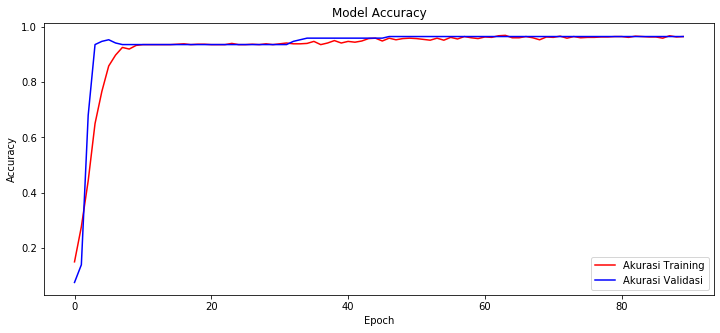

In [18]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

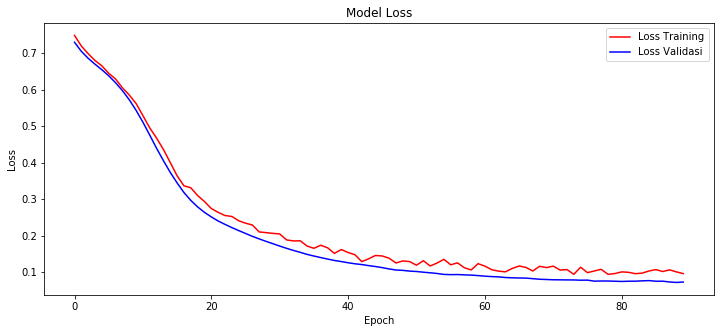

In [19]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [20]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [21]:
training_predicted.round()

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())


In [23]:
training_cm

array([[631,  11],
       [ 11,  33]], dtype=int64)

In [24]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.967930029154519
Specificity training 0.75
Sensitivity training 0.9828660436137072
Precision training 0.9828660436137072
F1 Score training 0.9828660436137072


In [25]:
print(testing_cm)

[[159   2]
 [  4   7]]


In [26]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9651162790697675
Specificity testing 0.6363636363636364
Sensitivity testing 0.9875776397515528
Precision testing 0.9754601226993865
F1 Score testing 0.9814814814814815
